## Метод предсказания заболеваний на основе алгоритмов машинного обучения

### Введение

Целью работы было определить наиболее эффективный с точки зрения временных затрат и точности способ предсказания заболеваний на основе наличия или отсутствия симптомов. Используя данные из датасета [Disease Prediction Using Machine Learning](https://www.kaggle.com/datasets/kaushil268/disease-prediction-using-machine-learning/data), включающего 132 признака симптомов и 42 категории заболеваний, был проведен анализ и выбран алгоритм, позволяющий с высокой точностью определять одно или несколько заболеваний.

Работа продемонстрировала возможность применения машинного обучения для автоматизации диагностики, что может значительно ускорить процесс определения заболеваний и предложить рекомендации по дальнейшим действиям.

### Этап 1: Первичный анализ данных и выбор метрик

**Цель этапа**

Основная задача заключалась в  изучении структуры данных и установлении ключевых метрик для объективной оценки качества модели.

**Исследование датасета**

*   Датасет состоит из двух наборов данных: обучающего и тестового
*   Датасет содержит 132 столбца, каждый из которых представляет симптом (категориальные данные), и один столбец с диагнозом (42 уникальных заболевания).
*   Симптомы включают как частые, например, fatigue или vomiting, так и редкие, такие как jaundice of the skin. Это требует учета частоты и диагностической значимости симптомов при построении модели.

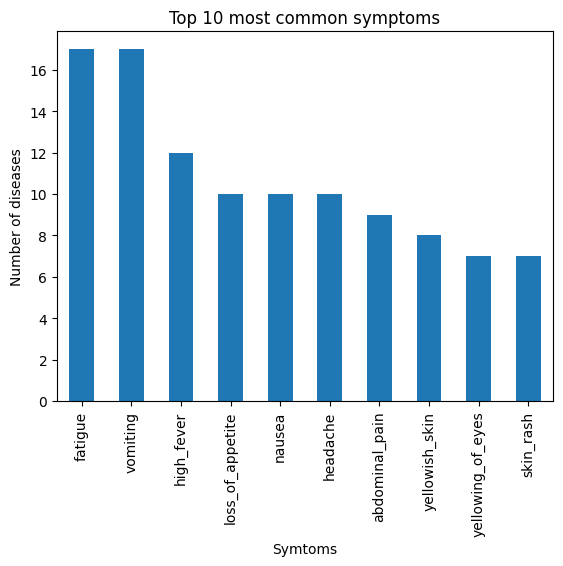

**Выбор ключевых метрик успеха:**
*   Accuracy: для оценки доли правильных предсказаний.
*   F1-мера: важна для учета баланса между точностью (precision) и полнотой (recall), особенно для многоклассовой классификации.

**Предварительная обработка данных:**



1.   Обработка пропусков: в датасете не оказалось пропущенных значений симптомов, однако оказался симптом который нигде не использовался.
2.   Кодирование симптомов: Симптомы преобразованы в числовые признаки с помощью label encoding.
3. Нормализация данных: Выполнена для улучшения работы алгоритмов.


```
from sklearn import preprocessing
features = train_df.iloc[:, :-1]
target = train_df['prognosis']

le = preprocessing.LabelEncoder()
encoded_target = le.fit_transform(target)
```
4. Выявлено, что данные сбалансированы по количеству примеров для каждого заболевания, что благоприятно влияет на обучение моделей.


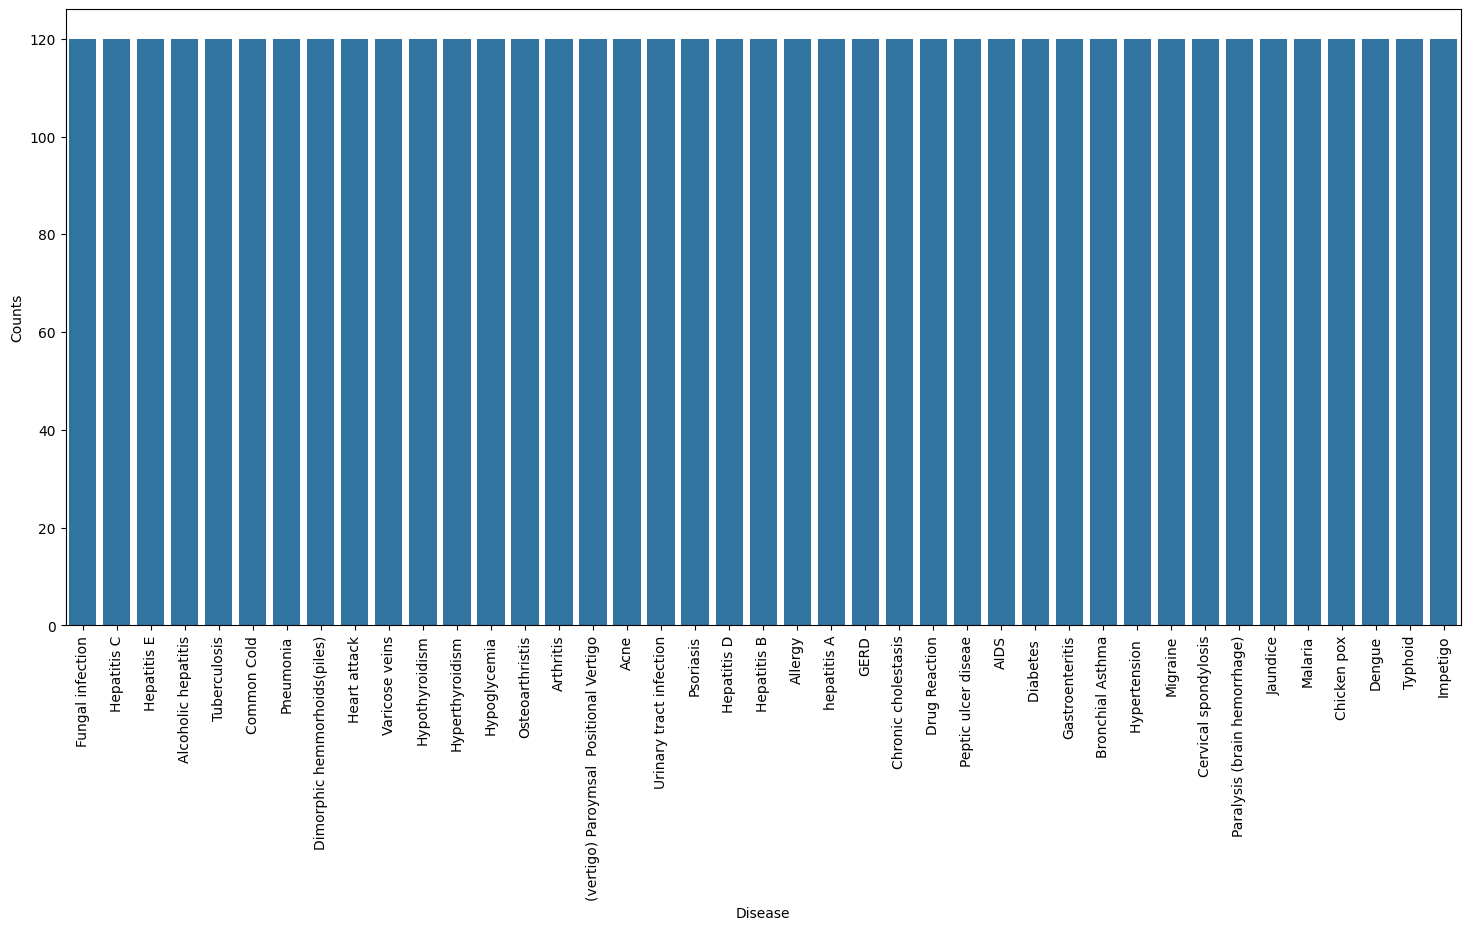

**Результаты:**

Этап завершен успешно. Установлены метрики оценки, проведена предварительная обработка данных и исследовательская работа с датасетом.

### Этап 2: Моделирование

#### 2.1 Исследование алгоритмов машинного обучения

**Цель этапа**

Сравнить производительность различных моделей машинного обучения на основе метрик Accuracy и F1-score.

Пример кода ниже демонстрирует процесс обучения одной из моделей. Для честного сравнения других алгоритмов изменялась только модель, тогда как остальные этапы, включая разбиение данных, стандартизацию и оценку, оставались неизменными.



```
svc_model = SVC()
svc_model.fit(X_train, y_train)

pred = svc_model.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print("Accuracy score for SVC is {}%".format(accuracy * 100))

f1 = f1_score(y_test, pred, average='weighted')
print("F1-score for SVC is {:.2f}".format(f1))
```



**Протестированные алгоритмы**

В рамках экспериментов было выбрано пять алгоритмов, которые зарекомендовали себя в задачах классификации. Каждый алгоритм был обучен на предварительно обработанных данных и протестирован на тестовом наборе. Результаты показали следующие значения метрик:



*   Support Vector Classifier (SVC):
 *  Accuracy: 84.19%
 *  F1-score: 0.88
 *  Этот алгоритм продемонстрировал хорошую сбалансированность между точностью и полнотой, особенно для редких классов.
*   KNeighborsClassifier:
 * Accuracy: 84.19%
 * F1-score: 0.84
 * Несмотря на высокую точность, модель хуже справляется с корреляцией признаков, что приводит к снижению F1-score.
*   Gaussian Naive Bayes (GaussianNB):
 * Accuracy: 73.54%
 * F1-score: 0.78
 * Наименее точная модель, что связано с упрощенными предположениями алгоритма о независимости признаков.
*   RandomForestClassifier:
 * Accuracy: 85.14%
 * F1-score: 0.85
 * Успешно справляется с шумом данных и коррелированными признаками, показывая лучшие результаты по Accuracy.
*   XGBClassifier:
 * Accuracy: 84.79%
 * F1-score: 0.85
 * Gradient Boosting оказался одной из наиболее эффективных моделей, особенно в условиях сложной структуры данных.



**Выводы:**

*   Random Forest и Gradient Boosting показали лучшую производительность.
*   SVC обеспечил высокий F1-score, что делает его полезным для классов с несбалансированной частотой.
* Наименее точными оказались KNeighborsClassifier и Naive Bayes из-за сложности и корреляции признаков.

#### 2.2 Оптимизация гиперпараметров

**Цель этапа**

На этом этапе была поставлена задача улучшить производительность моделей машинного обучения путем настройки их гиперпараметров. Это включало использование методов поиска по сетке (Grid Search) и кросс-валидации для выбора наиболее эффективных параметров.

Для оптимизации были выбраны две модели: SVC, благодаря высокому значению F1-меры, и RandomForestClassifier, который продемонстрировал также высокую точность классификации.

Для оптимизации гиперпараметров моделей был использован метод перебора по сетке (GridSearchCV). Этот подход позволяет систематически перебирать заданные комбинации параметров, находя наилучшие значения для достижения максимального качества модели.

Пример кода для оптимизации SVC:



```
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(svc_model, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_train, y_train)
```



1. Support Vector Classifier (SVC):


*   Оптимизация гиперпараметров:
 *   Были подобраны параметры: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
 *   Настройка C и gamma позволила модели лучше учитывать сложные зависимости в данных.

*   Результаты:
 *   F1-score увеличился до 0.90, что стало лучшим результатом среди всех моделей.
 *   Однако Accuracy снизилась до 83.76%, что может быть связано с избыточной настройкой на сбалансированность классов.

Пример кода для оптимизации RandomForestClassifier:



```
param_grid = {
    'n_estimators': [200, 300, 400],
    'max_features': ['log2', 'sqrt'],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_train, y_train)
```



2. RandomForestClassifier:


*   Оптимизация гиперпараметров:
 *   Были настроены параметры: {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 300}
 *   Эти настройки позволили улучшить как обобщающую способность модели, так и ее устойчивость к переобучению.

*   Результаты:
 *   Accuracy выросла до 85.48%, что является наилучшим результатом среди протестированных моделей.
 *   F1-score также увеличился до 0.87, что указывает на улучшение качества классификации.

**Выводы:**


1.   Random Forest показал лучшие результаты по Accuracy после оптимизации, что делает его предпочтительным выбором для задач с упором на точность.
2.   SVC достиг наивысшего значения F1-score, что делает его подходящим для задач, где важно учитывать сбалансированную классификацию всех классов, особенно редких.
3.   Оптимизация гиперпараметров позволила значительно улучшить производительность моделей, что доказывает необходимость тщательной настройки для получения наилучших результатов.

### Заключение

Таким образом, в рамках проекта было проведено исследование набора данных с симптомами и классификацией заболеваний.

**Выявлено:**


1.   Возможность эффективного предсказания заболеваний с помощью методов машинного обучения.
2.   Наиболее точными моделями для классификации являются Random Forest и Gradient Boosting. Random Forest показал лучшие результаты по Accuracy, а SVC – по F1-score.
3.   Оптимизация гиперпараметров повышает качество предсказаний, особенно для Random Forest.

Проект достиг поставленных целей, продемонстрировав, что автоматическая классификация заболеваний может существенно помочь врачам в диагностике.